# Load Libraries and Pre-Trained Model

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.decomposition import PCA

In [ ]:
import gensim.downloader as api
from scipy.spatial import distance

# Load a pre-trained model
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


# Percentage score where 0 is the female words and 100 is the male words


In [ ]:

# List of words to compare
professions = ['doctor', 'police', 'teacher', 'dancer', 'reporter']
females = ['female', 'woman', 'lady', 'girl', 'she', 'her']
males = ['male', 'man', 'guy', 'boy', 'he', 'him']

# Function to calculate average similarity
def calculate_average_similarity(word, comparison_words, model):
    similarities = []
    for comp_word in comparison_words:
        if word in model.key_to_index and comp_word in model.key_to_index:  # Check if words are in the model
            similarity = 1 - distance.cosine(model[word], model[comp_word])
            similarities.append(similarity)
        else:
            similarities.append(0)  # Handle cases where the word might not be in the model
    return sum(similarities) / len(similarities)

# Function to calculate the percentage score for a list of professions
def calculate_profession_scores(professions, females, males, model):
    scores = {}
    for profession in professions:
        avg_similarity_female = calculate_average_similarity(profession, females, model)
        avg_similarity_male = calculate_average_similarity(profession, males, model)
        # Normalize to a percentage score where 0 = female, 100 = male
        if avg_similarity_female + avg_similarity_male > 0:
            percentage_score = avg_similarity_male / (avg_similarity_female + avg_similarity_male) * 100
        else:
            percentage_score = 50  # If both similarities are zero, default to neutral
        scores[profession] = percentage_score
    return scores

# Assuming 'model' is your pre-trained word embedding model
# Calculate and print scores for each profession
profession_scores = calculate_profession_scores(professions, females, males, model)
for profession, score in profession_scores.items():
    print(f"Percentage score for '{profession}': {score:.2f}")


Percentage score for 'doctor': 49.84
Percentage score for 'police': 50.98
Percentage score for 'teacher': 42.56
Percentage score for 'dancer': 40.41
Percentage score for 'reporter': 47.22


# Comaparison to Image Percentage Scores


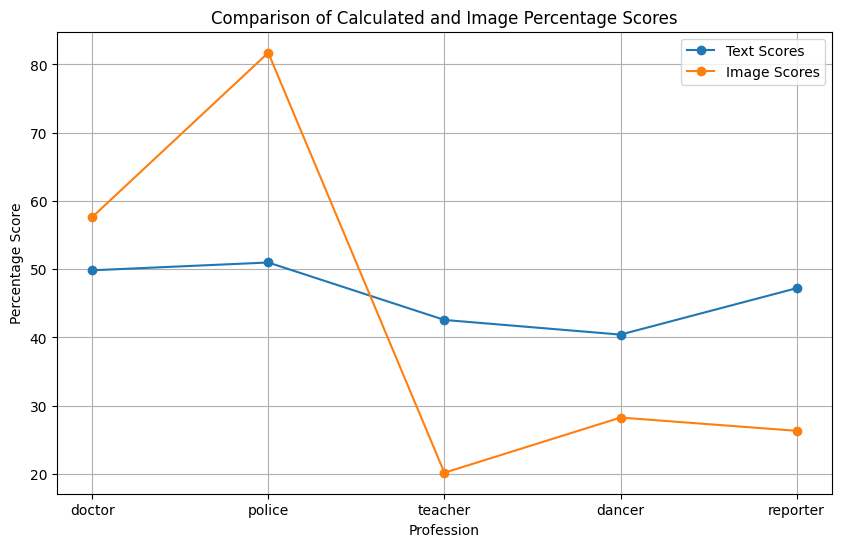

In [ ]:
import matplotlib.pyplot as plt

# Given image percentage scores
image_scores = {
    'doctor': 57.62,
    'police': 81.71,
    'dancer': 28.26,
    'teacher': 20.18,
    'reporter': 26.32
}

# Assuming 'model' is your pre-trained word embedding model
# List of professions to compare
professions = ['doctor', 'police', 'teacher', 'dancer', 'reporter']
females = ['female', 'woman', 'lady', 'girl', 'she', 'her']
males = ['male', 'man', 'guy', 'boy', 'he', 'him']

# Function to calculate average similarity
def calculate_average_similarity(word, comparison_words, model):
    similarities = []
    for comp_word in comparison_words:
        if word in model.key_to_index and comp_word in model.key_to_index:  # Check if words are in the model
            similarity = 1 - distance.cosine(model[word], model[comp_word])
            similarities.append(similarity)
        else:
            similarities.append(0)  # Handle cases where the word might not be in the model
    return sum(similarities) / len(similarities)

# Function to calculate the percentage score for a list of professions
def calculate_profession_scores(professions, females, males, model):
    scores = {}
    for profession in professions:
        avg_similarity_female = calculate_average_similarity(profession, females, model)
        avg_similarity_male = calculate_average_similarity(profession, males, model)
        # Normalize to a percentage score where 0 = female, 100 = male
        if avg_similarity_female + avg_similarity_male > 0:
            percentage_score = avg_similarity_male / (avg_similarity_female + avg_similarity_male) * 100
        else:
            percentage_score = 50  # If both similarities are zero, default to neutral
        scores[profession] = percentage_score
    return scores

# Calculate the profession scores using the pre-trained model
profession_scores = calculate_profession_scores(professions, females, males, model)

# Plotting the results
professions = list(profession_scores.keys())
calculated_scores = list(profession_scores.values())
image_scores_list = [image_scores[profession] for profession in professions]

x = range(len(professions))

plt.figure(figsize=(10, 6))
plt.plot(x, calculated_scores, label='Text Scores', marker='o')
plt.plot(x, image_scores_list, label='Image Scores', marker='o')
plt.xticks(x, professions)
plt.xlabel('Profession')
plt.ylabel('Percentage Score')
plt.title('Comparison of Calculated and Image Percentage Scores')
plt.legend()
plt.grid(True)
plt.show()
